<a href="https://colab.research.google.com/github/nkubana0/Water-Quality-Model---Peer-Group-11/blob/main/Diana_Ruzindana_Water_Quality_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model. You will be utilizing Keras and Tensorflow

## Water Quality Dataset




This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

2. Load and Inspect the Data

In [35]:
dataset = pd.read_csv('https://docs.google.com/spreadsheets/d/1H_kRGjtavba31uVjs-HILSNirokfz1R0MZa64ov4NR8/export?format=csv')

# Check for missing values
print("Missing values per column:")
print(dataset.isnull().sum())

Missing values per column:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Handle Missing Values

In [36]:
# Impute missing values with column mean
dataset['ph'].fillna(dataset['ph'].mean(), inplace=True)
dataset['Sulfate'].fillna(dataset['Sulfate'].mean(), inplace=True)
dataset['Trihalomethanes'].fillna(dataset['Trihalomethanes'].mean(), inplace=True)

# Confirm all missing values handled
print("\nMissing values after imputation:")
print(dataset.isnull().sum())


Missing values after imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


<ipython-input-36-7ded457a73eb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['ph'].fillna(dataset['ph'].mean(), inplace=True)
<ipython-input-36-7ded457a73eb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

3. Data Visualization

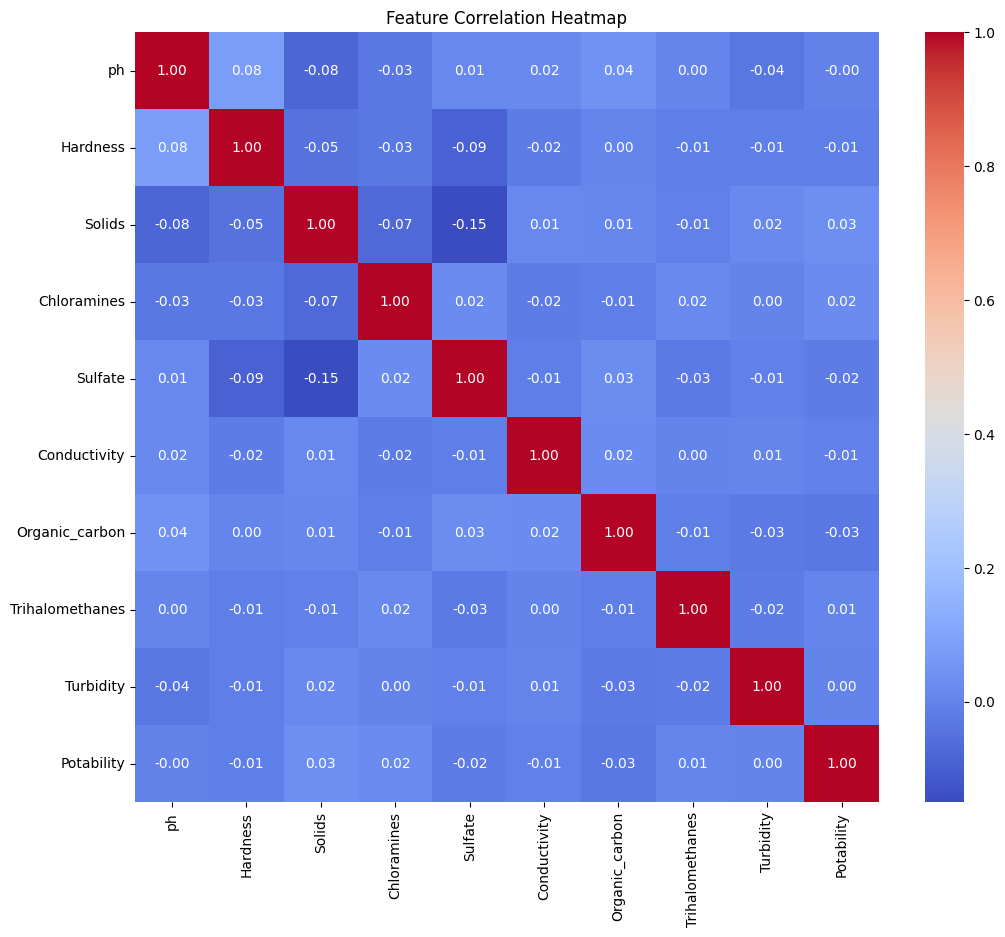

In [37]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

 2D Feature Plot: pH vs Hardness

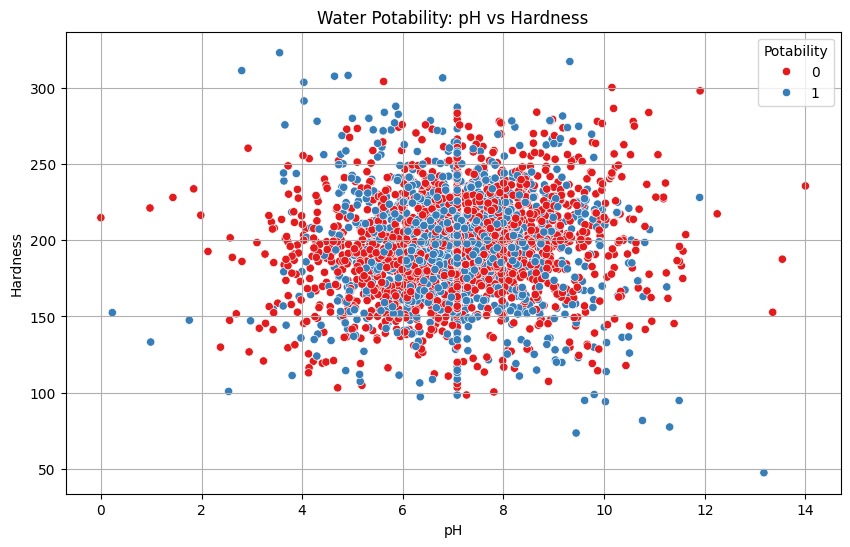

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='ph', y='Hardness', hue='Potability', palette='Set1')
plt.title('Water Potability: pH vs Hardness')
plt.xlabel('pH')
plt.ylabel('Hardness')
plt.legend(title='Potability')
plt.grid(True)
plt.show()

4. Data Preprocessing

In [39]:
X = dataset.drop(columns=['Potability'])
y = dataset['Potability']

Train-Validation-Test Split

In [40]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Normalize Features

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

5. Define the Model

In [42]:
#Model Definition by member 4
def diana_RMSprop_model():

    # Build the model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l1(0.001)),
        Dropout(0.4),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
        Dropout(0.4),
        Dense(10, activation='softmax')
    ])

    # Optimizer
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Define early stopping

    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

6. Set Up Early Stopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

7. Train the Model

In [44]:
model = model_diana()

history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=50,
                    batch_size=128,
                    callbacks=[early_stop],
                    verbose=2)

Epoch 1/50
18/18 - 2s - 99ms/step - accuracy: 0.5739 - loss: 0.6836 - val_accuracy: 0.6314 - val_loss: 0.6609
Epoch 2/50
18/18 - 0s - 18ms/step - accuracy: 0.5988 - loss: 0.6726 - val_accuracy: 0.6415 - val_loss: 0.6554
Epoch 3/50
18/18 - 0s - 13ms/step - accuracy: 0.6110 - loss: 0.6688 - val_accuracy: 0.6497 - val_loss: 0.6489
Epoch 4/50
18/18 - 0s - 7ms/step - accuracy: 0.6267 - loss: 0.6574 - val_accuracy: 0.6538 - val_loss: 0.6441
Epoch 5/50
18/18 - 0s - 8ms/step - accuracy: 0.6358 - loss: 0.6535 - val_accuracy: 0.6538 - val_loss: 0.6394
Epoch 6/50
18/18 - 0s - 9ms/step - accuracy: 0.6297 - loss: 0.6480 - val_accuracy: 0.6660 - val_loss: 0.6315
Epoch 7/50
18/18 - 0s - 9ms/step - accuracy: 0.6297 - loss: 0.6452 - val_accuracy: 0.6721 - val_loss: 0.6264
Epoch 8/50
18/18 - 0s - 15ms/step - accuracy: 0.6459 - loss: 0.6384 - val_accuracy: 0.6680 - val_loss: 0.6207
Epoch 9/50
18/18 - 0s - 8ms/step - accuracy: 0.6533 - loss: 0.6332 - val_accuracy: 0.6660 - val_loss: 0.6139
Epoch 10/50
18/

8. Evaluate the Model

Accuracy on Test Set

In [45]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6739 - loss: 0.5833 

Test Accuracy: 0.6951


 Classification Report

In [46]:
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       307
           1       0.71      0.32      0.44       185

    accuracy                           0.70       492
   macro avg       0.70      0.62      0.62       492
weighted avg       0.70      0.70      0.66       492



 Confusion Matrix

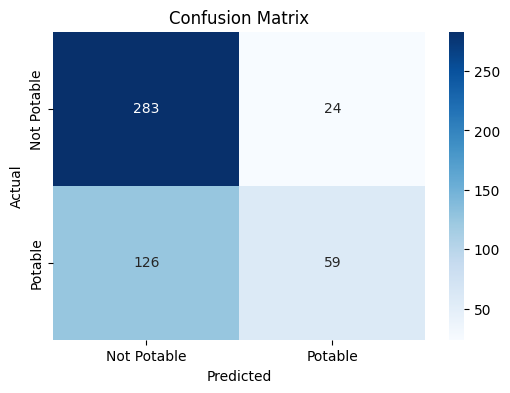

In [47]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

9.  Visualize Training History

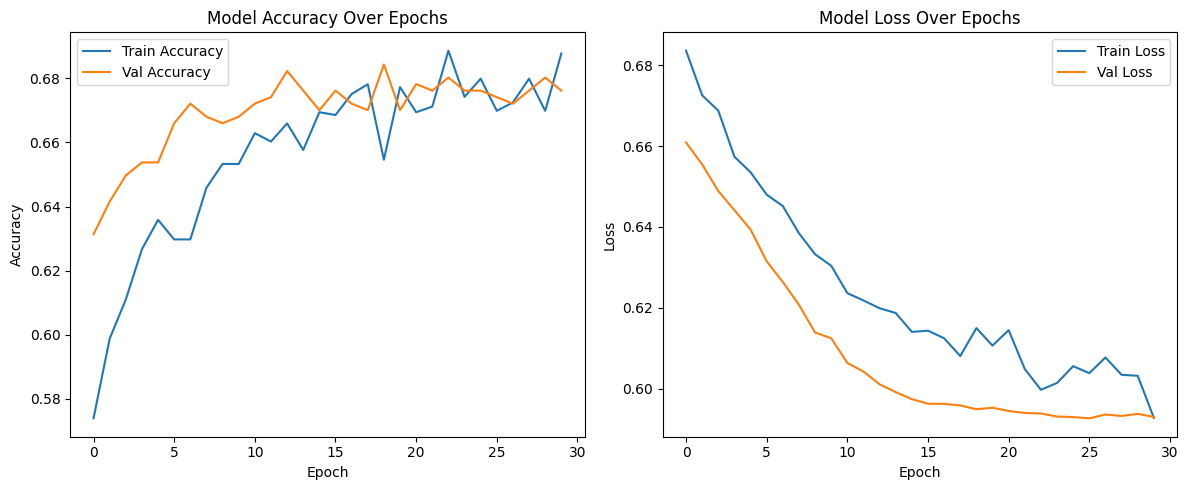

In [48]:
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()